In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

sns.set(style="whitegrid", color_codes=True)

data_original = pd.read_csv('data.csv', sep='|')

#legit_binaries = data_original[0:41323].drop(['legitimate'], axis=1)
legit_binaries = data_original[0:41323]
#malicious_binaries_original = data_original[41323::].drop(['legitimate'], axis=1)
malicious_binaries_original = data_original[41323::]

dasmalwerk_binaries = pd.read_csv('dasmalwerk_data.csv', sep='|')
temp = [malicious_binaries_original,dasmalwerk_binaries]
malicious_binaries = pd.concat(temp)

frames = [data_original, dasmalwerk_binaries]
result = pd.concat(frames)

In [2]:
result

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
5,airappinstaller.exe,e6e5a0ab3b1a27127c5c4a29b237d823,332,224,258,9,0,512,46592,0,...,10,4.843545,2.718577,7.965023,3858.600000,104,14671,0,16,1
6,AcroBroker.exe,dd7d901720f71e7e4f5fb13ec973d8e9,332,224,290,9,0,222720,67072,0,...,7,3.892779,1.346314,5.232167,1629.142857,52,8648,72,16,1
7,AcroRd32.exe,540c61844ccd78c121c3ef48f3a34f0e,332,224,290,9,0,823808,650240,0,...,29,4.102636,1.664392,6.373890,11939.689655,94,270376,72,15,1
8,AcroRd32Info.exe,9afe3c62668f55b8433cde602258236e,332,224,290,9,0,4096,7168,0,...,4,5.097499,3.435993,5.929812,616.500000,94,1164,72,15,1
9,AcroTextExtractor.exe,ba621a96e44f6558c08cf25b40cb1bd4,332,224,290,9,0,29696,12800,0,...,2,4.235788,3.456169,5.015407,820.000000,716,924,72,15,1


In [3]:
malicious_binaries.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,97812.000000,97812.000000,97812.000000,97812.000000,97812.000000,9.781200e+04,9.781200e+04,9.781200e+04,9.781200e+04,9.781200e+04,...,97812.000000,97812.000000,97812.000000,97812.000000,9.781200e+04,9.781200e+04,9.781200e+04,9.781200e+04,97812.000000,97812.0
mean,356.732262,224.013250,3271.686173,8.563970,5.020376,1.775303e+05,5.168360e+05,1.631619e+05,1.745101e+05,8.112110e+04,...,14.175858,4.140027,2.269352,5.928961,7.421060e+04,2.543978e+04,3.211231e+05,6.572179e+05,10.681757,0.0
std,917.646202,0.599752,9336.465549,4.839653,13.876564,6.776564e+06,2.492483e+07,2.034978e+07,4.055213e+06,6.567450e+06,...,32.872526,1.239004,0.701444,1.498942,9.265193e+06,7.724832e+06,2.521905e+07,3.099285e+07,7.382888,0.0
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.788800e+04,1.198080e+05,0.000000e+00,1.481900e+04,4.096000e+03,...,6.000000,3.501717,2.160964,5.217246,1.797120e+03,4.800000e+01,7.336000e+03,0.000000e+00,0.000000,0.0
50%,332.000000,224.000000,258.000000,10.000000,0.000000,1.172480e+05,3.834880e+05,0.000000e+00,5.890600e+04,4.096000e+03,...,7.000000,3.752798,2.458492,5.317552,2.739500e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.0
75%,332.000000,224.000000,259.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.156200e+04,4.096000e+03,...,14.000000,4.453368,2.458492,7.497521,1.260380e+04,4.800000e+01,2.905600e+04,7.200000e+01,15.000000,0.0
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,3060.000000,7.999723,7.999723,7.999993,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,0.0


In [4]:
legit_binaries.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,41323.000000,41323.000000,41323.000000,41323.000000,41323.000000,4.132300e+04,4.132300e+04,4.132300e+04,4.132300e+04,4.132300e+04,...,41323.000000,41323.000000,41323.000000,41323.000000,4.132300e+04,41323.000000,4.132300e+04,41323.000000,41323.000000,41323.0
mean,13395.021465,230.135469,7224.176802,8.728118,1.157709,3.964534e+05,2.910853e+05,9.512200e+02,1.712543e+05,5.093258e+03,...,40.929676,3.655430,2.807764,4.561510,9.822650e+03,528.408513,6.684507e+04,30.777243,16.312102,1.0
std,16566.440057,7.779781,3028.776865,1.164991,3.506482,1.376922e+06,2.231547e+06,5.145491e+04,6.547930e+05,2.869765e+04,...,243.389555,0.648224,0.960851,1.439574,8.989146e+04,433.608805,1.694117e+06,40.247742,2.145069,0.0
min,332.000000,224.000000,2.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.0
25%,332.000000,224.000000,8226.000000,8.000000,0.000000,7.168000e+03,6.144000e+03,0.000000e+00,4.581000e+03,4.096000e+03,...,1.000000,3.405390,2.471368,3.543990,8.320000e+02,126.000000,9.280000e+02,0.000000,16.000000,1.0
50%,332.000000,224.000000,8450.000000,9.000000,0.000000,6.041600e+04,2.355200e+04,0.000000e+00,2.017300e+04,4.096000e+03,...,2.000000,3.552150,3.369698,3.602333,9.600000e+02,356.000000,1.064000e+03,0.000000,16.000000,1.0
75%,34404.000000,240.000000,8450.000000,9.000000,0.000000,2.641920e+05,1.126400e+05,0.000000e+00,9.743150e+04,4.096000e+03,...,8.000000,3.920401,3.540218,5.169307,1.965172e+03,928.000000,9.640000e+03,72.000000,17.000000,1.0
max,34404.000000,240.000000,33679.000000,48.000000,60.000000,5.163418e+07,3.229082e+08,4.197376e+06,4.525109e+07,3.014656e+06,...,7694.000000,7.412816,5.140800,8.000000,3.907291e+06,7224.000000,3.124797e+08,160.000000,26.000000,1.0


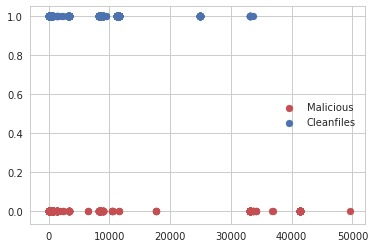

In [25]:
%matplotlib inline

fig,ax = plt.subplots()
x = malicious_binaries["Characteristics"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries['Characteristics']
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

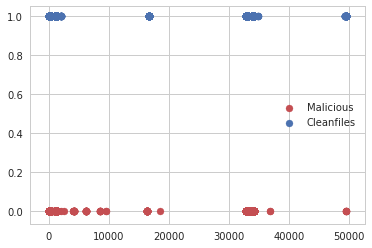

In [26]:
%matplotlib inline

fig,ax = plt.subplots()
x = malicious_binaries["DllCharacteristics"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries['DllCharacteristics']
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

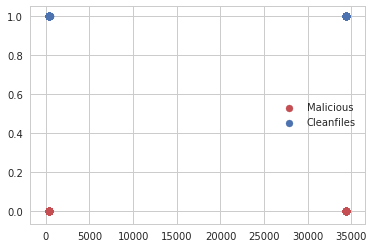

In [27]:
fig,ax = plt.subplots()
x = malicious_binaries["Machine"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries['Machine']
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

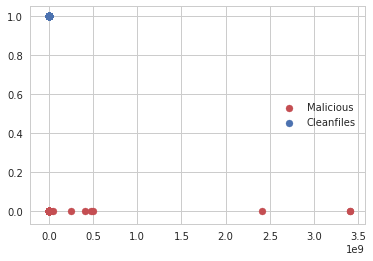

In [28]:
fig,ax = plt.subplots()
x = malicious_binaries["NumberOfRvaAndSizes"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries["NumberOfRvaAndSizes"]
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

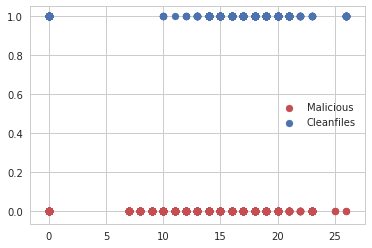

In [29]:
fig,ax = plt.subplots()
x = malicious_binaries["VersionInformationSize"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries["VersionInformationSize"]
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

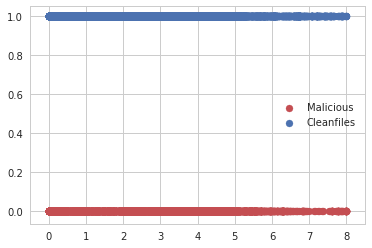

In [30]:
fig,ax = plt.subplots()
x = malicious_binaries["SectionsMinEntropy"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries["SectionsMinEntropy"]
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

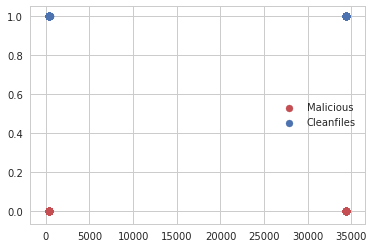

In [31]:
fig,ax = plt.subplots()
x = malicious_binaries["Machine"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries["Machine"]
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

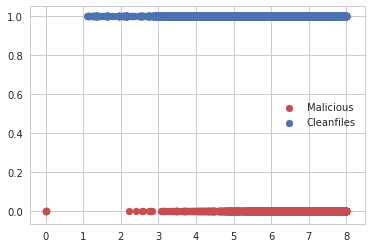

In [32]:
fig,ax = plt.subplots()
x = malicious_binaries["SectionsMaxEntropy"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries["SectionsMaxEntropy"]
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

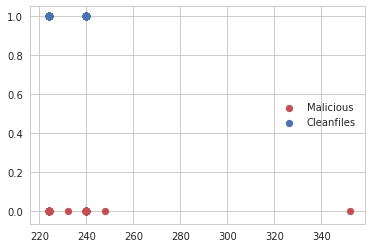

In [33]:
fig,ax = plt.subplots()
x = malicious_binaries["SizeOfOptionalHeader"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries["SizeOfOptionalHeader"]
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

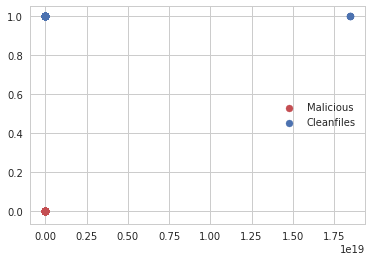

In [34]:
fig,ax = plt.subplots()
x = malicious_binaries["ImageBase"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries["ImageBase"]
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

In [35]:
#separate labels
X = result.drop(['Name', 'md5', 'legitimate'], axis=1).values
y = result['legitimate'].values

#feature reduction
fsel = ExtraTreesClassifier().fit(X, y)
model = SelectFromModel(fsel, prefit=True)

X_new = model.transform(X)
nb_features = X_new.shape[1]
indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
std = np.std([tree.feature_importances_ for tree in fsel.estimators_], axis=0)
for f in range(nb_features):
    print("%d. %s (%f)" % (f + 1, result.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))

1. DllCharacteristics (0.190997)
2. Machine (0.158466)
3. Characteristics (0.075445)
4. Subsystem (0.066517)
5. ImageBase (0.059559)
6. VersionInformationSize (0.056190)
7. SectionsMaxEntropy (0.053859)
8. ResourcesMinEntropy (0.038699)
9. SizeOfStackReserve (0.034443)
10. SectionsMinEntropy (0.027749)
11. ResourcesMaxEntropy (0.025364)
12. MajorOperatingSystemVersion (0.022404)
13. MajorSubsystemVersion (0.020026)
14. SizeOfOptionalHeader (0.019599)


In [36]:
from sklearn.linear_model import LassoCV

In [38]:
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]


In [39]:
n_features

0

In [5]:
result[:50]

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
5,airappinstaller.exe,e6e5a0ab3b1a27127c5c4a29b237d823,332,224,258,9,0,512,46592,0,...,10,4.843545,2.718577,7.965023,3858.600000,104,14671,0,16,1
6,AcroBroker.exe,dd7d901720f71e7e4f5fb13ec973d8e9,332,224,290,9,0,222720,67072,0,...,7,3.892779,1.346314,5.232167,1629.142857,52,8648,72,16,1
7,AcroRd32.exe,540c61844ccd78c121c3ef48f3a34f0e,332,224,290,9,0,823808,650240,0,...,29,4.102636,1.664392,6.373890,11939.689655,94,270376,72,15,1
8,AcroRd32Info.exe,9afe3c62668f55b8433cde602258236e,332,224,290,9,0,4096,7168,0,...,4,5.097499,3.435993,5.929812,616.500000,94,1164,72,15,1
9,AcroTextExtractor.exe,ba621a96e44f6558c08cf25b40cb1bd4,332,224,290,9,0,29696,12800,0,...,2,4.235788,3.456169,5.015407,820.000000,716,924,72,15,1


In [6]:
dasmalwerk_binaries[:50]

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,9ee6824c-9a86-11e6-98fa-80e65024849a.file,3c4de20e464146bec844471867bd1628,332,224,8462,2,50,51200,18944,0,...,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
1,61ec53ca-adcb-11e6-b72d-80e65024849a.file,e134e27613ac19bcbc8a897487ac9e96,332,224,258,10,0,29696,489984,16896,...,41,3.272179,2.403201,6.166077,832.146341,132,9640,0,0,0
2,6ca103f5-9eb2-11e6-bcb9-80e65024849a.file,27350fdc9f53cb093614aef9bd259276,332,224,271,6,0,23552,119808,1024,...,8,3.332325,1.819241,5.741651,547.625000,20,2216,0,12,0
3,9ecd8be3-ca8e-11e6-8784-80e65024849a.file,e096033aeb0ca9a9e504775e1951dfd0,332,224,271,6,0,23552,119808,1024,...,7,3.597358,1.919241,5.677280,1749.428571,20,9640,0,16,0
4,88937ccc-4d49-11e7-9f9f-80e65024849a.file,7830ae81a7f4aacd5254a978893f1f26,332,224,259,10,0,352256,155648,663552,...,21,5.730216,0.000000,7.954633,17614.666667,164,115874,72,16,0
5,390dbd33-b08b-11e6-ad2e-80e65024849a.file,a7593f0cb215231cd18877d846efeb59,332,224,8450,12,0,56832,146944,0,...,2,4.086032,3.260450,4.911615,364.500000,348,381,72,11,0
6,c1b7677d-49eb-11e7-a515-80e65024849a.file,f773e14ee1b70fd7d459bc77c71b4359,332,224,8462,7,10,266240,36864,0,...,0,0.000000,0.000000,0.000000,0.000000,0,0,72,0,0
7,706a393a-a1a3-11e6-b514-80e65024849a.file,158b710a2ce07e3a34e46118f2ad39f2,332,224,8450,12,0,131072,4096,106496,...,2,4.090695,3.269775,4.911615,364.500000,348,381,72,11,0
8,9cd1d278-a1a3-11e6-bf36-80e65024849a.file,c79dfcd9b989f48ae7900d41a2164618,332,224,259,9,0,24576,263680,8192,...,14,3.245138,2.437676,5.312294,1846.428571,96,9640,0,14,0
9,b3309640-9a86-11e6-8efe-80e65024849a.file,3b0a6a947ddefe22c4b6d8639066855d,332,224,33167,2,25,36864,16896,0,...,14,3.450572,2.645763,4.864578,651.785714,44,2216,0,13,0


In [7]:
legit_binaries[:50]

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
5,airappinstaller.exe,e6e5a0ab3b1a27127c5c4a29b237d823,332,224,258,9,0,512,46592,0,...,10,4.843545,2.718577,7.965023,3858.600000,104,14671,0,16,1
6,AcroBroker.exe,dd7d901720f71e7e4f5fb13ec973d8e9,332,224,290,9,0,222720,67072,0,...,7,3.892779,1.346314,5.232167,1629.142857,52,8648,72,16,1
7,AcroRd32.exe,540c61844ccd78c121c3ef48f3a34f0e,332,224,290,9,0,823808,650240,0,...,29,4.102636,1.664392,6.373890,11939.689655,94,270376,72,15,1
8,AcroRd32Info.exe,9afe3c62668f55b8433cde602258236e,332,224,290,9,0,4096,7168,0,...,4,5.097499,3.435993,5.929812,616.500000,94,1164,72,15,1
9,AcroTextExtractor.exe,ba621a96e44f6558c08cf25b40cb1bd4,332,224,290,9,0,29696,12800,0,...,2,4.235788,3.456169,5.015407,820.000000,716,924,72,15,1


In [54]:
cenas = [legit_binaries[:1000], dasmalwerk_binaries[:1000]]
cenas2 = pd.concat(cenas)

In [55]:
cenas2

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
5,airappinstaller.exe,e6e5a0ab3b1a27127c5c4a29b237d823,332,224,258,9,0,512,46592,0,...,10,4.843545,2.718577,7.965023,3858.600000,104,14671,0,16,1
6,AcroBroker.exe,dd7d901720f71e7e4f5fb13ec973d8e9,332,224,290,9,0,222720,67072,0,...,7,3.892779,1.346314,5.232167,1629.142857,52,8648,72,16,1
7,AcroRd32.exe,540c61844ccd78c121c3ef48f3a34f0e,332,224,290,9,0,823808,650240,0,...,29,4.102636,1.664392,6.373890,11939.689655,94,270376,72,15,1
8,AcroRd32Info.exe,9afe3c62668f55b8433cde602258236e,332,224,290,9,0,4096,7168,0,...,4,5.097499,3.435993,5.929812,616.500000,94,1164,72,15,1
9,AcroTextExtractor.exe,ba621a96e44f6558c08cf25b40cb1bd4,332,224,290,9,0,29696,12800,0,...,2,4.235788,3.456169,5.015407,820.000000,716,924,72,15,1


In [56]:
resources = ['ResourcesNb','ResourcesMeanEntropy','ResourcesMinEntropy','ResourcesMaxEntropy','ResourcesMeanSize','ResourcesMinSize','ResourcesMaxSize']

In [57]:
resources

['ResourcesNb',
 'ResourcesMeanEntropy',
 'ResourcesMinEntropy',
 'ResourcesMaxEntropy',
 'ResourcesMeanSize',
 'ResourcesMinSize',
 'ResourcesMaxSize']

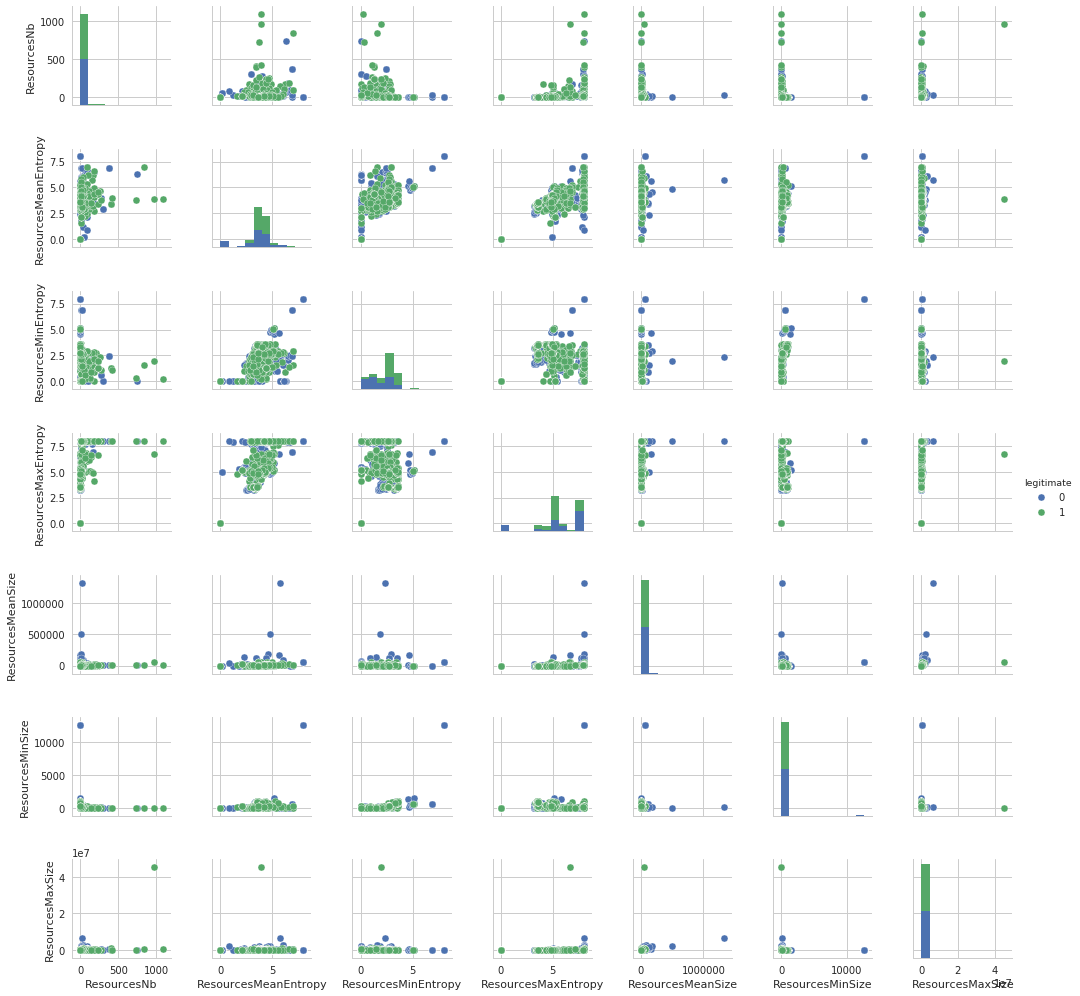

In [58]:
%matplotlib inline
sns.pairplot(cenas2, vars=resources, hue="legitimate", size=2)
plt.show()

In [59]:
list(cenas2.columns.values)

['Name',
 'md5',
 'Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'BaseOfData',
 'ImageBase',
 'SectionAlignment',
 'FileAlignment',
 'MajorOperatingSystemVersion',
 'MinorOperatingSystemVersion',
 'MajorImageVersion',
 'MinorImageVersion',
 'MajorSubsystemVersion',
 'MinorSubsystemVersion',
 'SizeOfImage',
 'SizeOfHeaders',
 'CheckSum',
 'Subsystem',
 'DllCharacteristics',
 'SizeOfStackReserve',
 'SizeOfStackCommit',
 'SizeOfHeapReserve',
 'SizeOfHeapCommit',
 'LoaderFlags',
 'NumberOfRvaAndSizes',
 'SectionsNb',
 'SectionsMeanEntropy',
 'SectionsMinEntropy',
 'SectionsMaxEntropy',
 'SectionsMeanRawsize',
 'SectionsMinRawsize',
 'SectionMaxRawsize',
 'SectionsMeanVirtualsize',
 'SectionsMinVirtualsize',
 'SectionMaxVirtualsize',
 'ImportsNbDLL',
 'ImportsNb',
 'ImportsNbOrdinal',
 'ExportNb',
 'ResourcesNb',
 'ResourcesMeanE

In [60]:
sections =[ 'SectionsNb',
 'SectionsMeanEntropy',
 'SectionsMinEntropy',
 'SectionsMaxEntropy',
 'SectionsMeanRawsize',
 'SectionsMinRawsize',
 'SectionMaxRawsize',
 'SectionsMeanVirtualsize',
 'SectionsMinVirtualsize',
 'SectionMaxVirtualsize']

In [61]:
sections

['SectionsNb',
 'SectionsMeanEntropy',
 'SectionsMinEntropy',
 'SectionsMaxEntropy',
 'SectionsMeanRawsize',
 'SectionsMinRawsize',
 'SectionMaxRawsize',
 'SectionsMeanVirtualsize',
 'SectionsMinVirtualsize',
 'SectionMaxVirtualsize']

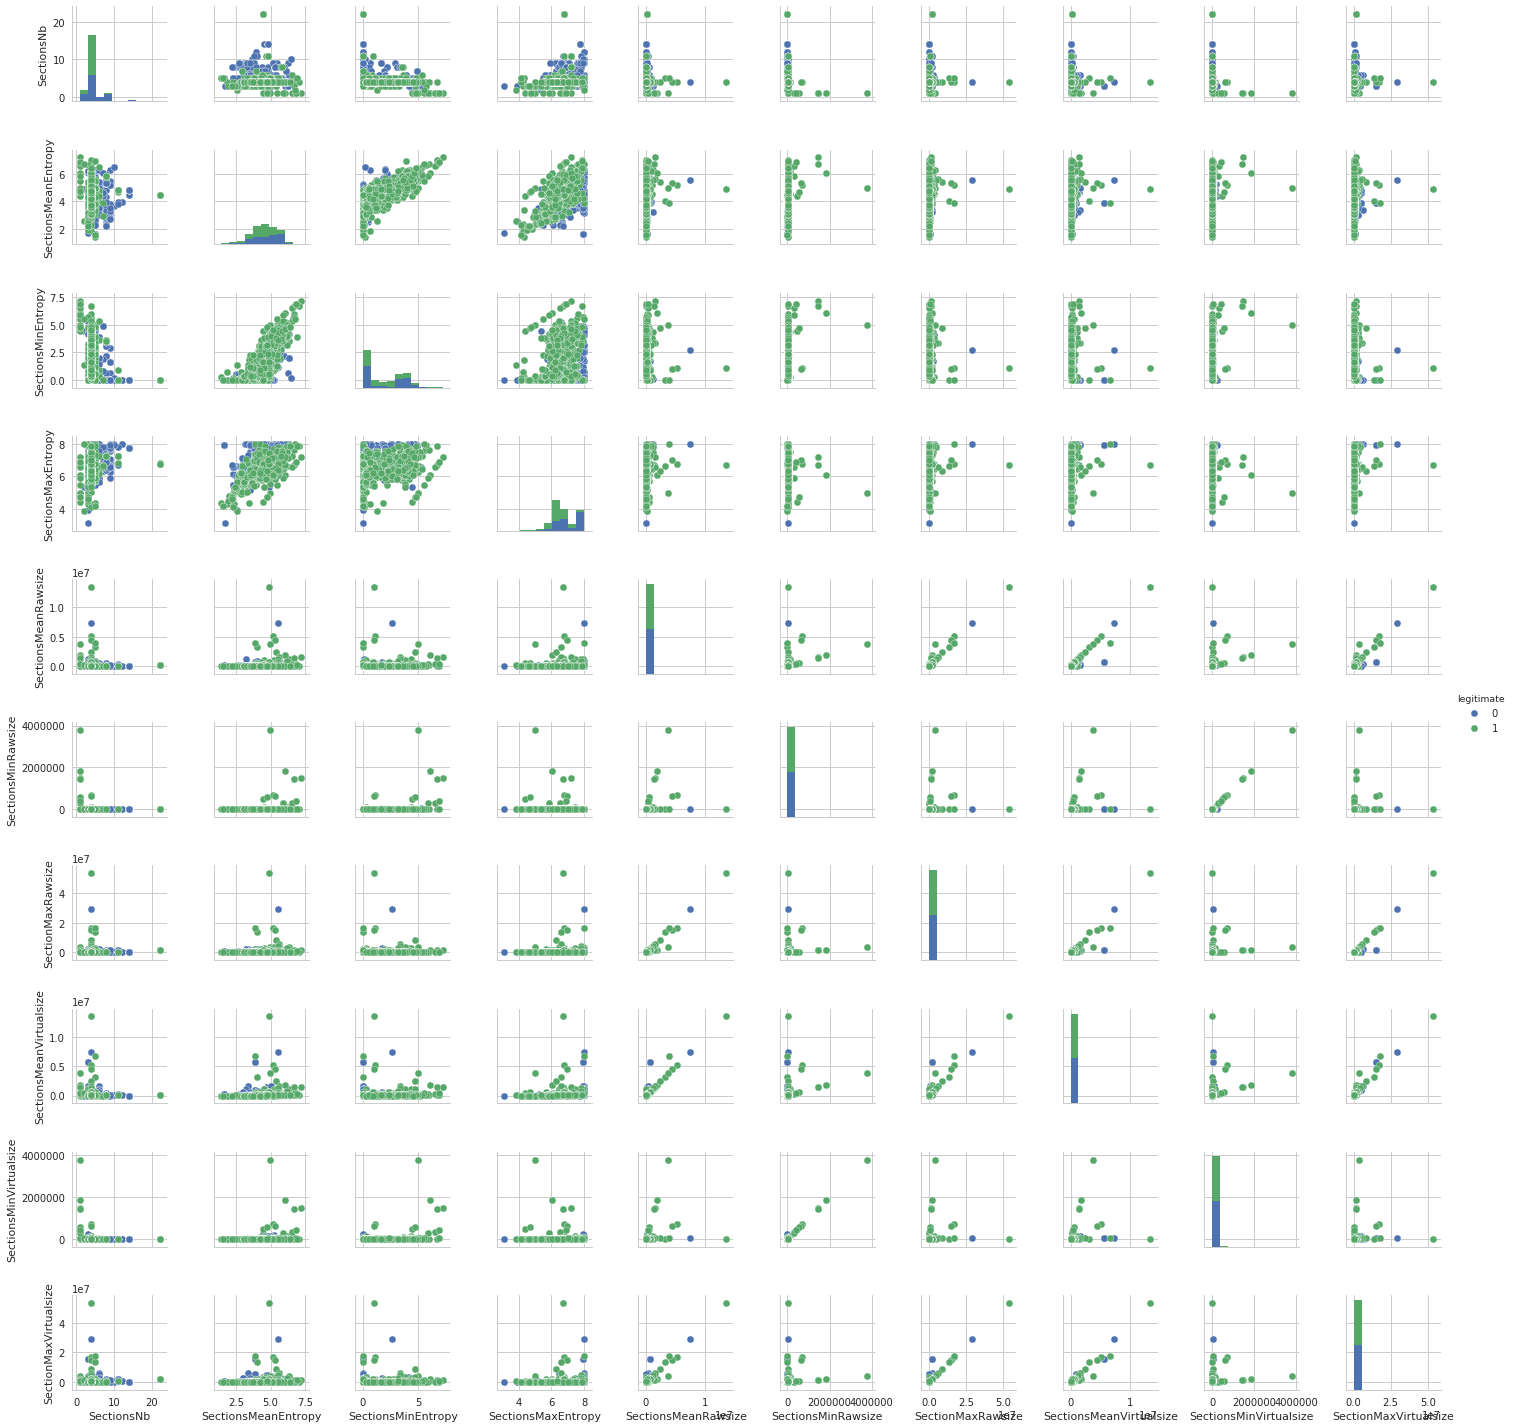

In [62]:
%matplotlib inline
sns.pairplot(cenas2, vars=sections, hue="legitimate", size=2)
plt.show()

In [69]:
cenas2 = cenas2.drop('legitimate', 1)

In [70]:
cenas2

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18
5,airappinstaller.exe,e6e5a0ab3b1a27127c5c4a29b237d823,332,224,258,9,0,512,46592,0,...,0,10,4.843545,2.718577,7.965023,3858.600000,104,14671,0,16
6,AcroBroker.exe,dd7d901720f71e7e4f5fb13ec973d8e9,332,224,290,9,0,222720,67072,0,...,0,7,3.892779,1.346314,5.232167,1629.142857,52,8648,72,16
7,AcroRd32.exe,540c61844ccd78c121c3ef48f3a34f0e,332,224,290,9,0,823808,650240,0,...,0,29,4.102636,1.664392,6.373890,11939.689655,94,270376,72,15
8,AcroRd32Info.exe,9afe3c62668f55b8433cde602258236e,332,224,290,9,0,4096,7168,0,...,0,4,5.097499,3.435993,5.929812,616.500000,94,1164,72,15
9,AcroTextExtractor.exe,ba621a96e44f6558c08cf25b40cb1bd4,332,224,290,9,0,29696,12800,0,...,0,2,4.235788,3.456169,5.015407,820.000000,716,924,72,15


In [72]:
corr = cenas2.corr()

In [73]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


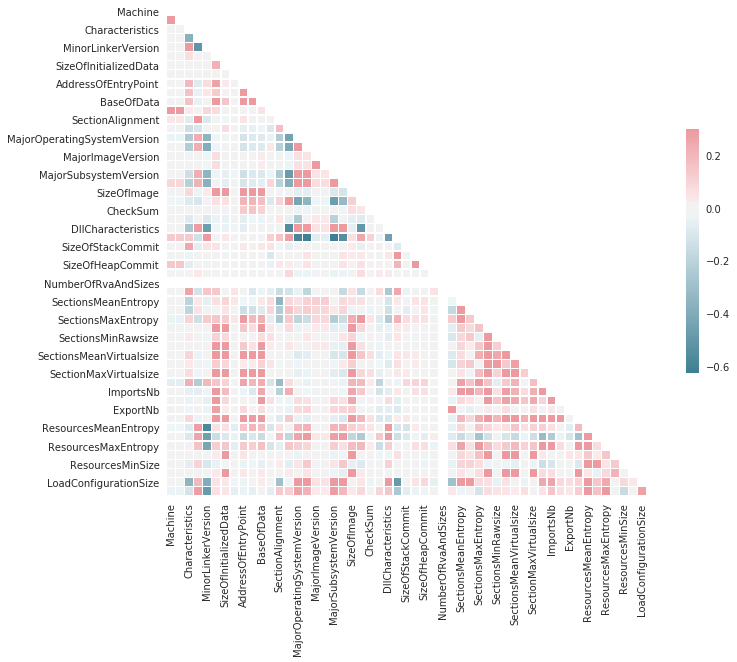

In [74]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [76]:
#separate labels
X = result.drop(['Name', 'md5', 'legitimate'], axis=1).values
y = result['legitimate'].values

#feature reduction
fsel = ExtraTreesClassifier().fit(X, y)
model = SelectFromModel(fsel, prefit=True)

X_new = model.transform(X)
nb_features = X_new.shape[1]
indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
std = np.std([tree.feature_importances_ for tree in fsel.estimators_], axis=0)
for f in range(nb_features):
    print("%d. %s (%f)" % (f + 1, result.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))

1. DllCharacteristics (0.154847)
2. Machine (0.122751)
3. Characteristics (0.110765)
4. VersionInformationSize (0.089182)
5. ResourcesMaxEntropy (0.076914)
6. SizeOfOptionalHeader (0.067741)
7. Subsystem (0.039964)
8. ImageBase (0.036569)
9. MajorOperatingSystemVersion (0.029595)
10. ResourcesMinEntropy (0.028985)
11. MajorSubsystemVersion (0.020216)
12. SectionsMaxEntropy (0.020072)
13. SectionsNb (0.019956)
14. MinorLinkerVersion (0.019127)


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

algorithms = {
        "DecisionTree": DecisionTreeClassifier(max_depth=10),
        "RandomForest": RandomForestClassifier(n_estimators=50),
        "GradientBoosting": GradientBoostingClassifier(n_estimators=50),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "GNB": GaussianNB(),
        "MLP": MLPClassifier(hidden_layer_sizes=(12,12,12,12,12,12)),
        "SVM": svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    }
results = {}
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.25)
print("\nNow testing algorithms")
for algo in algorithms:
    clf = algorithms[algo]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("%s : %f %%" % (algo, score*100))
    results[algo] = score

winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% success' % (winner, results[winner]*100))


Now testing algorithms
SVM : 98.464811 %
RandomForest : 99.335902 %
MLP : 70.207567 %
GradientBoosting : 98.735051 %
GNB : 70.161569 %
DecisionTree : 98.904669 %
AdaBoost : 98.605681 %

Winner algorithm is RandomForest with a 99.335902 % success
